In [3]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator



In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode="nearest")

In [9]:
trainImageData = train_datagen.flow_from_directory("C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\training",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     ) 
testImageData = train_datagen.flow_from_directory("C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\testing",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(64,64) #Ensures all images are of same size (resizing)
                                                     ) 

Found 2392 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


In [10]:
class_name_train = trainImageData.class_indices
print(class_name_train)
class_name_test = testImageData.class_indices
print(class_name_test)
trainImageData.image_shape


{'flip': 0, 'notflip': 1}
{'flip': 0, 'notflip': 1}


(64, 64, 3)

In [11]:
## the model itself 
import tensorflow as tf
cnn = tf.keras.models.Sequential()

In [12]:
from keras import backend as K
print(K.image_data_format())

channels_last


In [13]:
cnn.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve


In [14]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling


In [15]:
cnn.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 

In [16]:
cnn.add(tf.keras.layers.Flatten())


In [18]:
cnn.add(tf.keras.layers.Dropout(0.2))
#changing units to less
cnn.add(tf.keras.layers.Dense(units= 256, activation="relu"))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units= 128, activation="relu"))
cnn.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))


In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)             

In [20]:
 import tensorflow_addons as tfa

#Compile

cnn.compile(optimizer="adam",
              loss="binary_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=[tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

C:\Users\agnes\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\agnes\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [21]:
len(trainImageData.filenames) // trainImageData.batch_size

74

In [22]:
# fit 
cnn.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

Epoch 1/10
74/74 [==============================] - 289s 4s/step - loss: 0.6932 - f1_score: 0.6761 - val_loss: 0.6929 - val_f1_score: 0.6774
Epoch 2/10
74/74 [==============================] - 231s 3s/step - loss: 0.6931 - f1_score: 0.6779 - val_loss: 0.6929 - val_f1_score: 0.6789
Epoch 3/10
74/74 [==============================] - 231s 3s/step - loss: 0.6934 - f1_score: 0.6782 - val_loss: 0.6928 - val_f1_score: 0.6804
Epoch 4/10
74/74 [==============================] - 231s 3s/step - loss: 0.6931 - f1_score: 0.6794 - val_loss: 0.6927 - val_f1_score: 0.6804
Epoch 5/10
74/74 [==============================] - 230s 3s/step - loss: 0.6928 - f1_score: 0.6812 - val_loss: 0.6932 - val_f1_score: 0.6743
Epoch 6/10
74/74 [==============================] - 230s 3s/step - loss: 0.6931 - f1_score: 0.6779 - val_loss: 0.6933 - val_f1_score: 0.6713
Epoch 7/10
74/74 [==============================] - 231s 3s/step - loss: 0.6929 - f1_score: 0.6797 - val_loss: 0.6927 - val_f1_score: 0.6804
Epoch 8/10
74

In [23]:
cnn.save('smaller.keras_tf')

INFO:tensorflow:Assets written to: smaller.keras_tf\assets


INFO:tensorflow:Assets written to: smaller.keras_tf\assets


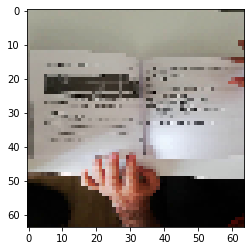

In [24]:
import matplotlib.pyplot as plt
imageToPredict = tf.keras.preprocessing.image.load_img(r'C:\Users\agnes\Documents\apziva_ai_residency\project4\data\images\testing\flip\0065_000000001.jpg', target_size=(64,64))
plt.imshow(imageToPredict)

In [25]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(64, 64, 3)

In [27]:

# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 64, 64, 3)

In [28]:

#Step4: Prediction
prediction = cnn.predict(myCompatibleImage)

1/1 [==============================] - 0s 90ms/step


In [29]:
print(prediction)

[[0.51099616]]


In [ ]:
### model not as accurate
## but less than 55 mb